In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from tools import plot, plotarray

In [8]:
# Training data
X_train = np.array([[0.0], [1.0], [2.0], [3.0]]).view(plotarray)
y_train = np.array([1.2, 0.9, 0.3, 0.1]).view(plotarray)

# Test points for prediction
X_test = np.linspace(-1, 4, 200).reshape(-1, 1)

# Kernel parameters
length_scale = 1.0
sigma_n = 0.1  # Noise std dev

# Compute kernel matrices using RBF
kernel = RBF(length_scale=length_scale)

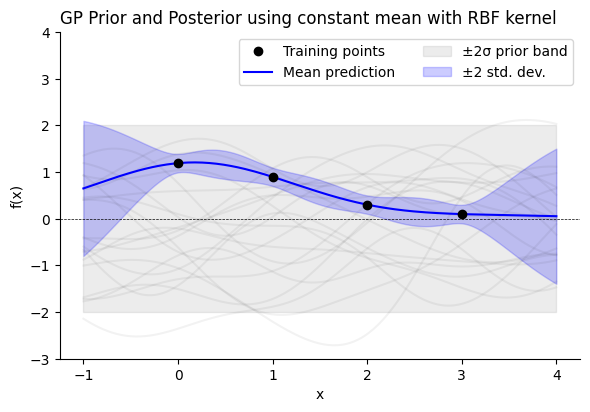

In [9]:
K_ss = kernel(X_test, X_test)

# GP Prior mean and covariance
mu_prior = np.zeros(len(X_test))
cov_prior = K_ss  # Since K_ss = k(X_test, X_test)
std_prior = np.sqrt(np.diag(cov_prior)).view(plotarray)

# Draw sample functions from the prior
samples = np.random.multivariate_normal(mu_prior, cov_prior, size=20)

K = kernel(X_train, X_train).view(plotarray) + sigma_n**2 * np.eye(len(X_train))
K_inv = np.linalg.inv(K)
K_s = kernel(X_train, X_test).view(plotarray)

# COMPUTING THE MEAN
# K_inv is the inverse of training covariance with noise added
# K @ K_inv @ y_train would give y_train
# K_s is the covariance between train and test points (i.e., the distance in kernel space)
# so, if we exchange K with K_s, we get the mean prediction at the test points
mu_s = (K_s.T @ K_inv @ y_train)
# COMPUTING THE VARIANCE
# K_ss is the covariance of the test points with themselves (i.e., the distance in kernel space)
cov_s = (K_ss - K_s.T @ K_inv @ K_s)
std_s = (np.sqrt(np.diag(cov_s))).view(plotarray)

fig, ax0 = plot(X_train, y_train, X_test, mu_s, std_s, mu_prior, std_prior, samples)
ax0.set_title("GP Prior and Posterior using constant mean with RBF kernel", loc='left')
ax0.set_ylim(-3, 4)
fig.savefig('./imgs/basic_gp_numpy-constant_mean+RBF.png', transparent=True, dpi=140, bbox_inches='tight')

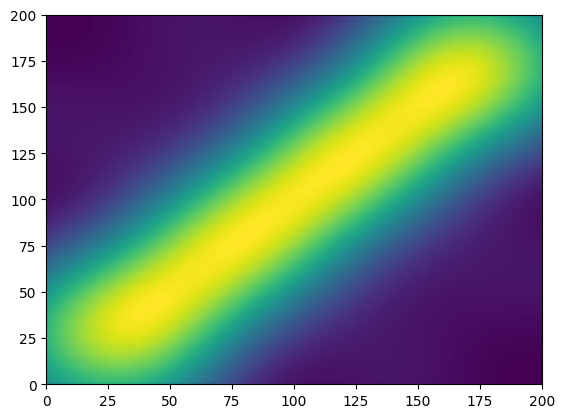

In [27]:
plt.pcolormesh(K_s.T @ K_inv @ K_s)

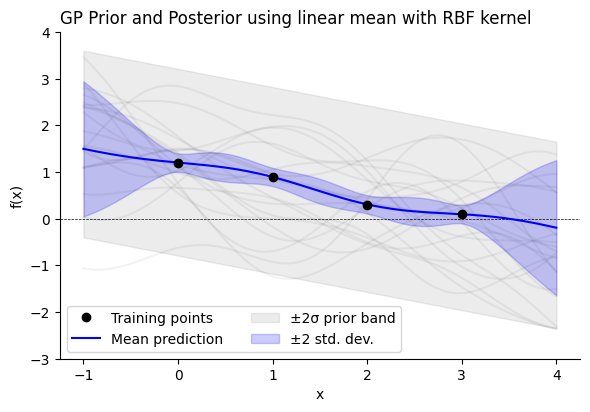

In [6]:
from sklearn.linear_model import LinearRegression

# Step 1: Fit linear model to training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_linear_fit = linreg.predict(X_train)
mu_prior = linreg.predict(X_test)

samples = np.random.multivariate_normal(mu_prior, cov_prior, size=20)

# GP Prior mean and covariance
cov_prior = K_ss  # Since K_ss = k(X_test, X_test)
std_prior = np.sqrt(np.diag(cov_prior)).view(plotarray)

# Step 2: Compute residuals
residuals = y_train - y_linear_fit

# Step 3: GP on residuals
# (This part stays the same, just use residuals instead of y_train)
mu_test = linreg.predict(X_test)
K = kernel(X_train, X_train) + sigma_n**2 * np.eye(len(X_train))
K_s = kernel(X_train, X_test)
K_ss = kernel(X_test, X_test)

K_inv = np.linalg.inv(K)
mu_s = mu_test + K_s.T @ K_inv @ residuals
cov_s = K_ss - K_s.T @ K_inv @ K_s
std_s = np.sqrt(np.diag(cov_s))

fig, ax1 = plot(X_train, y_train, X_test, mu_s, std_s, mu_prior, std_prior, samples)
ax1.set_title("GP Prior and Posterior using linear mean with RBF kernel", loc='left')
ax1.set_ylim(-3, 4)
fig.savefig('./imgs/basic_gp_numpy-linear_mean+RBF.png', transparent=True, dpi=140, bbox_inches='tight')